Index(['Depth', 'Fe203', 'Al203'], dtype='object')
frequency = [ 7 14 18  8  6  5  2] [15.2 18.8 22.4 26.  29.6 33.2 36.8 40.4]
relative_frequency = [0.11666667 0.23333333 0.3        0.13333333 0.1        0.08333333
 0.03333333]
cumulative_frequency = [ 7 21 39 47 53 58 60]
iron_mean = 25.17516666666666
iron_median = 24.700000000000003
iron_mode = 27.8
aluminum_mean = 43.03666666666666
aluminum_median = 44.69
aluminum_mode = 39.02


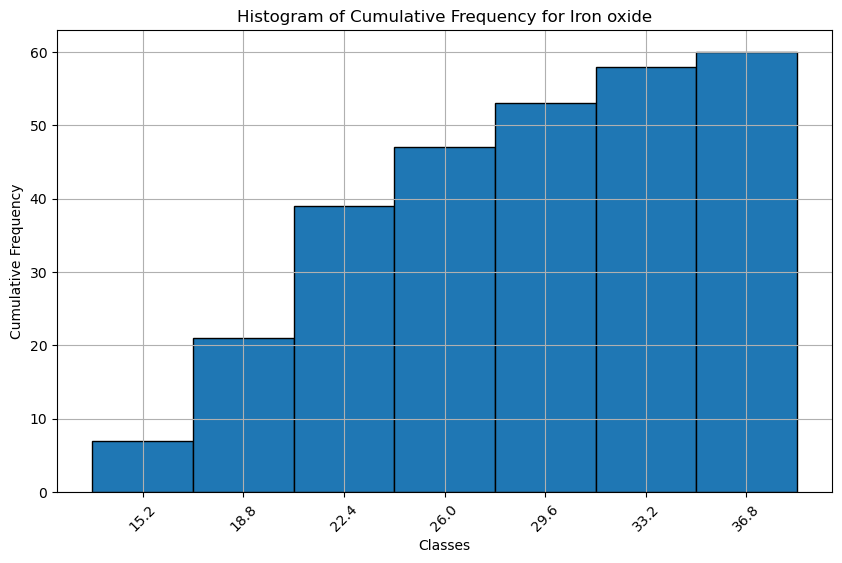

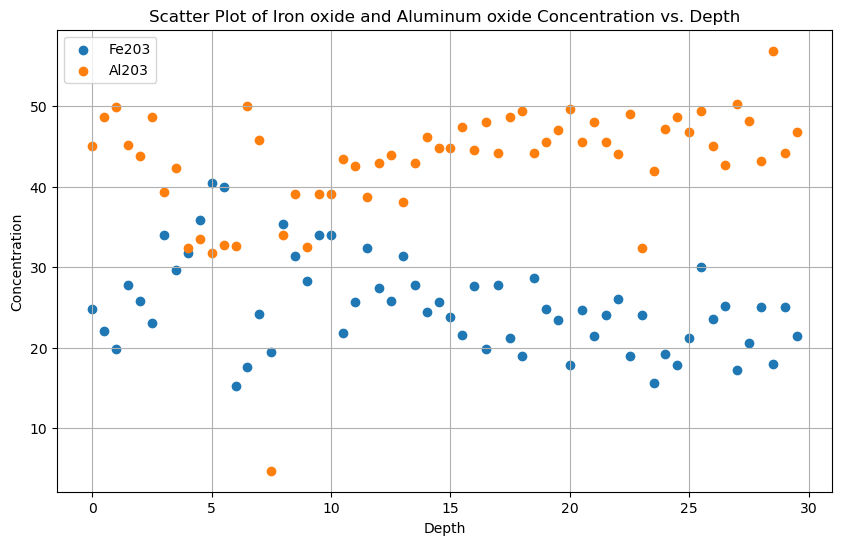

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('You are provided with elements concentration values of Fe₂o₃ and Al₂o₃ in a borehole of a bauxite deposit.(these values are in unites of %)')

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('D:\D.T\geology\G408\geostatistics task.xlsx')

print(df.columns)

# 1. Create Frequency distribution, Relative frequency, and Cumulative frequency for Iron oxide (class number = 7)
iron_oxide_data = df['Fe203']
aluminum_data = df['Al203']

num_classes = 7

# Calculate class width
data_range = iron_oxide_data.max() - iron_oxide_data.min()
class_width = data_range / num_classes

# Create bins
bins = [iron_oxide_data.min() + i * class_width for i in range(num_classes + 1)]

# Calculate frequency, relative frequency, and cumulative frequency
frequency, _ = np.histogram(iron_oxide_data, bins=bins)
relative_frequency = frequency / len(iron_oxide_data)
cumulative_frequency = np.cumsum(frequency)

print("frequency =", frequency, _)
print("relative_frequency =", relative_frequency)
print("cumulative_frequency =", cumulative_frequency)

# 2. Calculate Mean, Median, Mode for Iron oxide and Aluminum oxide element concentrations
iron_mean = np.mean(iron_oxide_data)
iron_median = np.median(iron_oxide_data)
iron_mode = df['Fe203'].mode().values[0]  # Mode might have multiple values, so we select the first one

print("iron_mean =", iron_mean)
print("iron_median =", iron_median)
print("iron_mode =", iron_mode)

aluminum_data = df['Al203']
aluminum_mean = np.mean(aluminum_data)
aluminum_median = np.median(aluminum_data)
aluminum_mode = df['Al203'].mode().values[0]  # Mode might have multiple values, so we select the first one

print("aluminum_mean =", aluminum_mean)
print("aluminum_median =", aluminum_median)
print("aluminum_mode =", aluminum_mode)

# 3. Create Histogram for Iron oxide cumulative frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), cumulative_frequency, width=1, edgecolor='black')
plt.xlabel('Classes')
plt.ylabel('Cumulative Frequency')
plt.title('Histogram of Cumulative Frequency for Iron oxide')
plt.xticks(range(num_classes), bins[:-1], rotation=45)
plt.grid(True)
plt.show()

# 4. Draw a scatter plot of the Iron oxide and Aluminum oxide element concentration against depth
plt.figure(figsize=(10, 6))
plt.scatter(df['Depth'], iron_oxide_data, label='Fe203')
plt.scatter(df['Depth'], aluminum_data, label='Al203')
plt.xlabel('Depth')
plt.ylabel('Concentration')
plt.title('Scatter Plot of Iron oxide and Aluminum oxide Concentration vs. Depth')
plt.legend()
plt.grid(True)
plt.show()